# Exercise 1
Minimize $y = i^2 - 4i$ where i is a variable that can take on integer values between -5 and 5 (inclusive).

## Create Model

In [1]:
# required imports
from dwave.optimization import Model

# create blank model
model = Model()

# add in i variable
i = model.integer(lower_bound=-5, upper_bound=5)

# add in constant of 4
c = model.constant(4)

# create $y = i^2 - 4i$
y = i**2 - c*i

# minimize y
model.minimize(y)

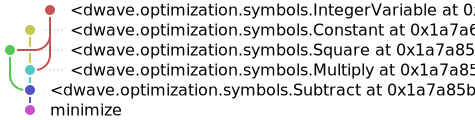

In [2]:
# Display nodes
import dagviz
from IPython.display import display, SVG
G = model.to_networkx() 
r = dagviz.render_svg(G)

# Display the SVG content directly in Jupyter Lab
display(SVG(r))

In [3]:
# The following image represents the DAG of the model of minimize $y = i^2 - 4i$
from IPython.display import Image
from IPython.core.display import HTML
Image(url="https://docs.dwavequantum.com/en/latest/_images/simple_polynomial_DAG.png")

## Solve Problem
Send the NL Model to the LeapHybridNLSampler

In [4]:
# hint-use LeapHybridNLSampler in dwave.system
from dwave.system import LeapHybridNLSampler
sampler = LeapHybridNLSampler()
sampler.sample(model)

<Future at 0x1a7c64a18d0 state=running>

## Check Results

In [5]:
# Check the objective and value of i
current_state = 0
with model.lock():
    print(model.objective.state(current_state))
    print(i.state(current_state))

-4.0
2.0
